Phase 1 : Data Exploration

1. Install library

In [ ]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn xgboost

2. Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')

# Gabungkan data toko ke data penjualan
df = pd.merge(train, store, on='Store')

# Konversi kolom tanggal
df['Date'] = pd.to_datetime(df['Date'])

# Lihat data awal
print(df.shape)
df.head()


C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_16684\958352833.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/train.csv')


(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


3. Exploratory Data Analysis (EDA)

Statistik deskriptif:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870



Cek missing values:


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


Distribusi penjualan (Sales):


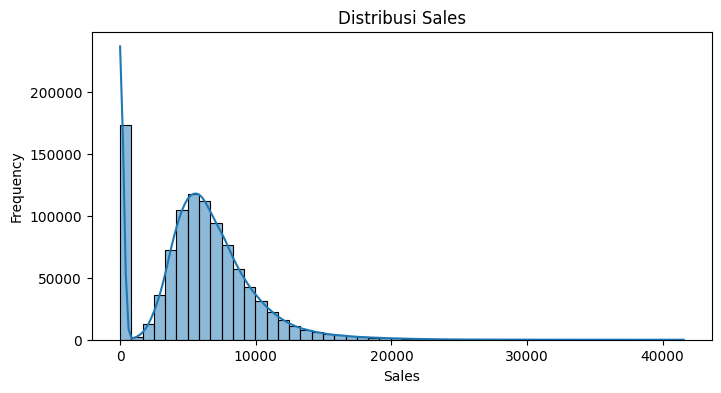


Jumlah toko unik: 1115
Rentang tanggal: 2013-01-01 00:00:00 sampai 2015-07-31 00:00:00


In [2]:
# Exploratory Data Analysis (EDA)
print("Statistik deskriptif:")
display(df.describe())

print("\nCek missing values:")
display(df.isnull().sum())

print("\nDistribusi penjualan (Sales):")
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribusi Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

print("\nJumlah toko unik:", df['Store'].nunique())
print("Rentang tanggal:", df['Date'].min(), "sampai", df['Date'].max())

3. Data Quality Check

Jumlah missing values per kolom:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Contoh data dengan missing values:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


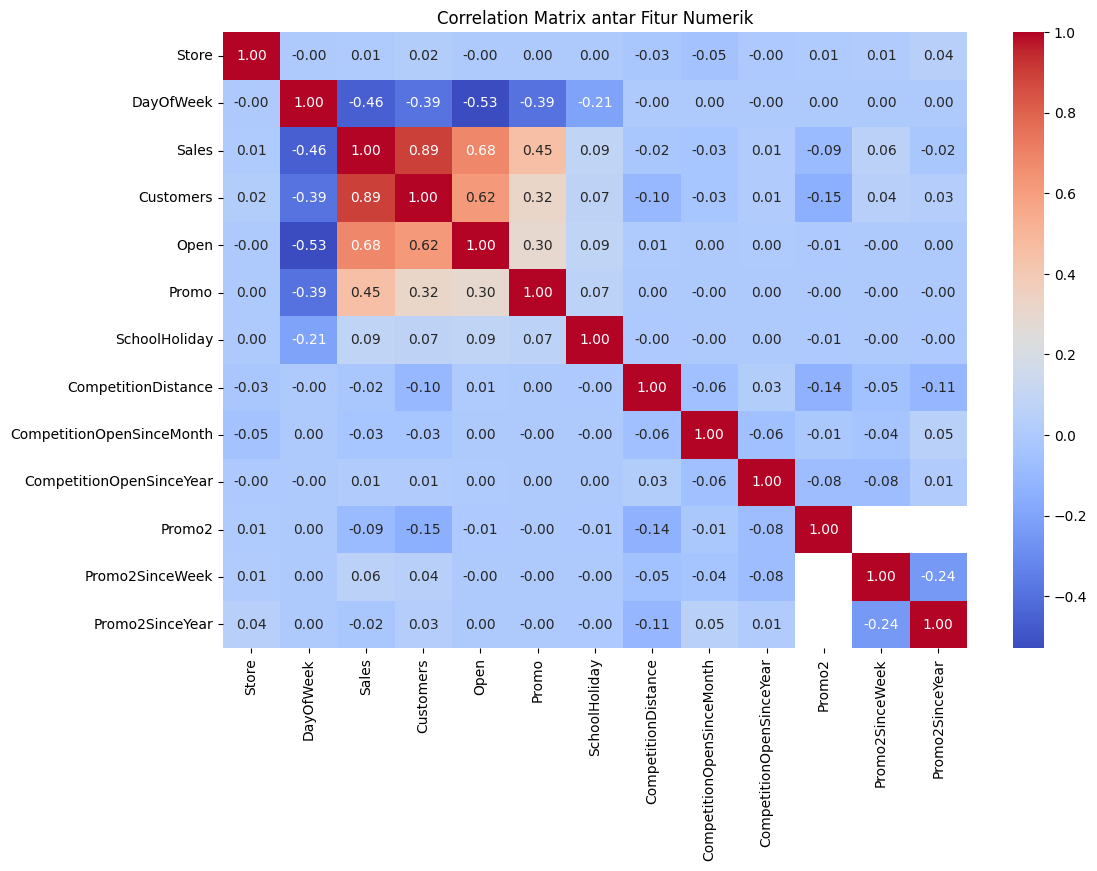


Korelasi fitur dengan Sales:
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Promo2SinceWeek              0.059558
CompetitionOpenSinceYear     0.012659
Store                        0.005126
CompetitionDistance         -0.019229
Promo2SinceYear             -0.021127
CompetitionOpenSinceMonth   -0.028257
Promo2                      -0.091040
DayOfWeek                   -0.462125
Name: Sales, dtype: float64


In [3]:
# Data Quality Check
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

print("\nContoh data dengan missing values:")
display(df[df.isnull().any(axis=1)].head())

# Feature Correlation Analysis
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix antar Fitur Numerik')
plt.show()

print("\nKorelasi fitur dengan Sales:")
print(corr['Sales'].sort_values(ascending=False))

Phase 2: Feature Engineering

1. Load data hasil merge dari phase 1

In [4]:
import pandas as pd

# Load data train dan store
train = pd.read_csv('data/train.csv', parse_dates=['Date'])
store = pd.read_csv('data/store.csv')

# Merge data
df = pd.merge(train, store, on='Store')

# 1. Create temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

# 2. Handle categorical variables
df['StoreType_enc'] = df['StoreType'].astype('category').cat.codes
df['Assortment_enc'] = df['Assortment'].astype('category').cat.codes
df['StateHoliday_enc'] = df['StateHoliday'].astype('category').cat.codes

# 3. Create interaction features
df['Promo_StoreType'] = df['Promo'] * df['StoreType_enc']
df['Competition_Promo'] = df['CompetitionDistance'] * df['Promo']

# Cek hasil feature engineering
print(df.head())

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_16684\3821510352.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/train.csv', parse_dates=['Date'])


   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4 2015-07-31   5263        555     1      1            0   
1      2          4 2015-07-31   6064        625     1      1            0   
2      3          4 2015-07-31   8314        821     1      1            0   
3      4          4 2015-07-31  13995       1498     1      1            0   
4      5          4 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ...    PromoInterval  Year  Month  Day  IsWeekend  \
0              1         c  ...              NaN  2015      7   31          0   
1              1         a  ...  Jan,Apr,Jul,Oct  2015      7   31          0   
2              1         a  ...  Jan,Apr,Jul,Oct  2015      7   31          0   
3              1         c  ...              NaN  2015      7   31          0   
4              1         a  ...              NaN  2015      7   31          0   

   StoreType_enc  Assortment_enc StateHolida

2. Create temporal features 
  Ekstraksi fitur waktu dari kolom `Date`, seperti `Year`, `Month`, `Day`, dan `DayOfWeek`. Fitur ini membantu model memahami pola musiman, tren mingguan, serta efek hari libur terhadap penjualan.


In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

print(df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend']].head())

        Date  Year  Month  Day  DayOfWeek  IsWeekend
0 2015-07-31  2015      7   31          4          0
1 2015-07-31  2015      7   31          4          0
2 2015-07-31  2015      7   31          4          0
3 2015-07-31  2015      7   31          4          0
4 2015-07-31  2015      7   31          4          0


Fitur-fitur ini membantu model memahami pengaruh waktu terhadap penjualan, seperti efek musim, hari libur, dan pola mingguan.

3. Handle categorical variables
Mengubah fitur kategori menjadi bentuk numerik agar bisa diproses oleh algoritma machine learning.

In [6]:
df['StoreType_enc'] = df['StoreType'].astype('category').cat.codes
df['Assortment_enc'] = df['Assortment'].astype('category').cat.codes
df['StateHoliday_enc'] = df['StateHoliday'].astype('category').cat.codes

print(df[['StoreType', 'StoreType_enc', 'Assortment', 'Assortment_enc', 'StateHoliday', 'StateHoliday_enc']].head())

  StoreType  StoreType_enc Assortment  Assortment_enc StateHoliday  \
0         c              2          a               0            0   
1         a              0          a               0            0   
2         a              0          a               0            0   
3         c              2          c               2            0   
4         a              0          a               0            0   

   StateHoliday_enc  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  


Encoding fitur kategori seperti StoreType, Assortment, dan StateHoliday ke bentuk numerik agar model dapat memanfaatkan informasi kategori dengan optimal.

3. Create interaction features
Membuat fitur baru dari hasil interaksi antara dua atau lebih variabel, agar model dapat menangkap hubungan kompleks antar fitur.

In [7]:
df['Promo_StoreType'] = df['Promo'] * df['StoreType_enc']
df['Competition_Promo'] = df['CompetitionDistance'] * df['Promo']

print(df[['Promo', 'StoreType_enc', 'Promo_StoreType', 'CompetitionDistance', 'Competition_Promo']].head())

   Promo  StoreType_enc  Promo_StoreType  CompetitionDistance  \
0      1              2                2               1270.0   
1      1              0                0                570.0   
2      1              0                0              14130.0   
3      1              2                2                620.0   
4      1              0                0              29910.0   

   Competition_Promo  
0             1270.0  
1              570.0  
2            14130.0  
3              620.0  
4            29910.0  


Fitur interaksi seperti Promo_StoreType dan Competition_Promo membantu model memahami efek gabungan antara promo, tipe toko, dan kompetisi terhadap penjualan.

3. Feature selection
Menghapus fitur yang tidak relevan atau tidak tersedia di data test agar model lebih efisien dan akurat.

In [8]:
drop_cols = ['Customers']  # misal Customers tidak tersedia di test set
df = df.drop(columns=drop_cols, errors='ignore')

print(df.head())

   Store  DayOfWeek       Date  Sales  Open  Promo StateHoliday  \
0      1          4 2015-07-31   5263     1      1            0   
1      2          4 2015-07-31   6064     1      1            0   
2      3          4 2015-07-31   8314     1      1            0   
3      4          4 2015-07-31  13995     1      1            0   
4      5          4 2015-07-31   4822     1      1            0   

   SchoolHoliday StoreType Assortment  ...    PromoInterval  Year  Month  Day  \
0              1         c          a  ...              NaN  2015      7   31   
1              1         a          a  ...  Jan,Apr,Jul,Oct  2015      7   31   
2              1         a          a  ...  Jan,Apr,Jul,Oct  2015      7   31   
3              1         c          c  ...              NaN  2015      7   31   
4              1         a          a  ...              NaN  2015      7   31   

   IsWeekend  StoreType_enc Assortment_enc  StateHoliday_enc  Promo_StoreType  \
0          0              2  

Seleksi fitur dilakukan untuk mengurangi noise dan memastikan hanya fitur yang relevan dan tersedia di data test yang digunakan untuk modeling.

Phase 3: Model Development

1. Base line Model

Baseline model menggunakan Linear Regression sebagai langkah awal untuk memprediksi penjualan toko. Model ini dipilih karena sederhana, mudah diinterpretasi, dan dapat memberikan gambaran awal performa prediksi sebelum menggunakan model yang lebih kompleks.

Pada tahap ini, fitur-fitur utama seperti informasi waktu, kategori toko, promosi, dan interaksi antar fitur digunakan sebagai input model. Data dengan nilai penjualan (Sales) nol dihapus dari data training dan validasi untuk menghindari error pada perhitungan RMSPE.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Pilih fitur dan target
features = [
    'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'DayOfWeek',
    'IsWeekend', 'StoreType_enc', 'Assortment_enc', 'StateHoliday_enc',
    'Promo_StoreType', 'Competition_Promo'
]

# Drop baris yang mengandung NaN pada fitur yang digunakan dan Sales=0
Xy = df[features + ['Sales']].dropna()
Xy = Xy[Xy['Sales'] != 0]  # Hapus baris dengan Sales=0 agar RMSPE tidak inf
X = Xy[features]
y = Xy['Sales']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

# RMSPE metric (abaikan Sales=0)
def rmspe(y_true, y_pred):
    mask = y_true != 0
    return np.sqrt(np.mean(np.square((y_true[mask] - y_pred[mask]) / y_true[mask])))

score = rmspe(y_val, y_pred)
print("Baseline Linear Regression RMSPE:", score)

# (Opsional) Lihat contoh prediksi
print("Contoh prediksi:", y_pred[:5])

Baseline Linear Regression RMSPE: 0.6193151323926683
Contoh prediksi: [5538.04912715 8853.47659488 8701.95536672 7746.08592003 5997.09544698]


- RMSPE (Root Mean Square Percentage Error) sebesar 0.619 menunjukkan rata-rata persentase error prediksi model terhadap data validasi. Nilai ini menjadi acuan awal (benchmark) untuk membandingkan model-model berikutnya.
  
- Contoh prediksi menampilkan hasil prediksi penjualan pada beberapa sampel data validasi. Nilai-nilai ini dapat dibandingkan dengan nilai aktual untuk melihat seberapa dekat hasil prediksi baseline terhadap kenyataan.


2. Hyperparameter Tuning

Pada tahap ini, dilakukan pencarian kombinasi parameter terbaik untuk model menggunakan teknik seperti Grid Search atau Randomized Search. Hyperparameter tuning bertujuan untuk meningkatkan performa model dengan mengoptimalkan parameter seperti jumlah pohon, kedalaman pohon, dan learning rate pada model Random Forest atau XGBoost.

In [17]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi model XGBoost dengan GPU
xgb_model = xgb.XGBRegressor(
    tree_method='hist',
    device='cuda',
    random_state=42
)
# Definisikan parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Randomized Search dengan 3-fold cross-validation
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

print("Mulai tuning...")
random_search.fit(X_train, y_train)
print("Tuning selesai!")
print("Best Params:", random_search.best_params_)
print("Best Score (neg RMSE):", random_search.best_score_)

Mulai tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tuning selesai!
Best Params: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2}
Best Score (neg RMSE): -1322.6325276692708


- Warning:
XGBoost memberi tahu bahwa mulai versi 2.0.0, penggunaan tree_method='gpu_hist' sudah deprecated (tidak direkomendasikan lagi). Untuk training di GPU, sebaiknya gunakan tree_method='hist' dan tambahkan device='cuda'.
Warning lain menyebutkan bahwa parameter predictor sudah tidak digunakan dan bisa dihapus dari inisialisasi model.

- Tuning selesai!
Proses hyperparameter tuning berhasil dijalankan.

- Best Params: Menampilkan kombinasi parameter terbaik hasil tuning, yaitu:
n_estimators: 100
max_depth: 10
learning_rate: 0.2
Best Score (neg RMSE): Nilai negative root mean squared error terbaik pada validasi silang, yaitu -1322.63. Nilai ini bisa dibandingkan dengan model lain untuk memilih model terbaik.
 

3. Cross-validation

Cross-validation digunakan untuk mengevaluasi performa model secara lebih robust dengan membagi data menjadi beberapa fold. Teknik ini membantu memastikan model tidak overfitting dan hasil evaluasi lebih representatif.

In [18]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Inisialisasi model dengan parameter terbaik hasil tuning
best_params = random_search.best_params_
xgb_model = xgb.XGBRegressor(
    tree_method='hist',
    device='cuda',
    random_state=42,
    **best_params
)

# Cross-validation 5-fold, scoring pakai neg_root_mean_squared_error
scores = cross_val_score(
    xgb_model,
    X,
    y,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Konversi ke RMSE positif
rmse_scores = -scores
print("Cross-validation RMSE per fold:", rmse_scores)
print("Mean CV RMSE:", np.mean(rmse_scores))

Cross-validation RMSE per fold: [1503.16296387 1577.73303223 1427.38708496 1557.6081543  1502.62365723]
Mean CV RMSE: 1513.702978515625


- Model dievaluasi pada 5 fold berbeda, sehingga hasil lebih stabil.
- Nilai RMSE rata-rata dari cross-validation digunakan untuk membandingkan performa antar model.


4. Model Comparison

Model comparison dilakukan untuk membandingkan performa beberapa algoritma (misal: Linear Regression, Random Forest, XGBoost) menggunakan metrik yang sama, seperti RMSE atau RMSPE. Tujuannya adalah memilih model dengan performa terbaik untuk prediksi penjualan.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

# Misal: param hasil tuning RandomForest dan XGBoost
rf_best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}  # contoh, sesuaikan hasil tuning RF
xgb_best_params = {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2}   # dari random_search.best_params_

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(**rf_best_params, random_state=42),
    "XGBoost": xgb.XGBRegressor(tree_method='hist', device='cuda', random_state=42, **xgb_best_params)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(
        model, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1
    )
    rmse_scores = -scores
    results[name] = np.mean(rmse_scores)
    print(f"{name} Mean CV RMSE: {np.mean(rmse_scores):.4f}")

print("\nModel Comparison (Mean CV RMSE):")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Linear Regression Mean CV RMSE: 2840.0480
Random Forest Mean CV RMSE: 2510.0974
XGBoost Mean CV RMSE: 1513.7030

Model Comparison (Mean CV RMSE):
Linear Regression: 2840.0480
Random Forest: 2510.0974
XGBoost: 1513.7030


-Linear Regression Mean CV RMSE: 2840.0480
Model linear sederhana menghasilkan rata-rata error prediksi (RMSE) sebesar 2840 pada validasi silang.

-Random Forest Mean CV RMSE: 2510.0974
Model Random Forest, setelah tuning, menghasilkan error yang lebih rendah dibanding Linear Regression, yaitu 2510.

-XGBoost Mean CV RMSE: 1513.7030
Model XGBoost dengan tuning dan GPU menghasilkan error terendah, yaitu 1513, menandakan performa prediksi terbaik di antara ketiga model.

In [23]:
# Pilih model terbaik berdasarkan hasil model comparison (XGBoost)
import xgboost as xgb

# Inisialisasi model XGBoost dengan parameter terbaik hasil tuning
final_model = xgb.XGBRegressor(
    tree_method='hist',
    device='cuda',
    random_state=42,
    **xgb_best_params  # gunakan parameter hasil tuning XGBoost
)

# Training ulang model pada seluruh data training
final_model.fit(X, y)

print("Model XGBoost dengan parameter terbaik telah dipilih dan dilatih pada seluruh data training.")
print("Parameter model:", final_model.get_params())

Model XGBoost dengan parameter terbaik telah dipilih dan dilatih pada seluruh data training.
Parameter model: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'hist', 'validate_para